Using device: cpu
Total samples: 4132
Class distribution:
labels
Parasitized    2066
Uninfected     2066
Name: count, dtype: int64

Split sizes:
Train: 2892
Validation: 620
Test: 620

Training VIT...


VIT Epoch 1/5: 100%|██████████| 91/91 [1:48:45<00:00, 71.71s/it, loss=0.00848, acc=91.5]



Epoch 1:
Train Loss: 0.2694, Train Acc: 0.9149
Val Loss: 0.3241, Val Acc: 0.8726


VIT Epoch 2/5: 100%|██████████| 91/91 [1:22:36<00:00, 54.47s/it, loss=0.00884, acc=92.6]



Epoch 2:
Train Loss: 0.2808, Train Acc: 0.9257
Val Loss: 0.3200, Val Acc: 0.9258


VIT Epoch 3/5: 100%|██████████| 91/91 [2:12:00<00:00, 87.04s/it, loss=0.00758, acc=93.1]  



Epoch 3:
Train Loss: 0.2407, Train Acc: 0.9312
Val Loss: 0.2061, Val Acc: 0.9323


VIT Epoch 4/5: 100%|██████████| 91/91 [2:09:17<00:00, 85.25s/it, loss=0.00603, acc=94.7]  



Epoch 4:
Train Loss: 0.1915, Train Acc: 0.9467
Val Loss: 0.1782, Val Acc: 0.9500


VIT Epoch 5/5: 100%|██████████| 91/91 [49:15<00:00, 32.48s/it, loss=0.00543, acc=95.3]  



Epoch 5:
Train Loss: 0.1726, Train Acc: 0.9526
Val Loss: 0.1714, Val Acc: 0.9484


C:\Users\kingk\AppData\Local\Temp\ipykernel_7540\4012382868.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(Config.MODEL_


Test Loss: 0.1281
Test Accuracy: 0.9597


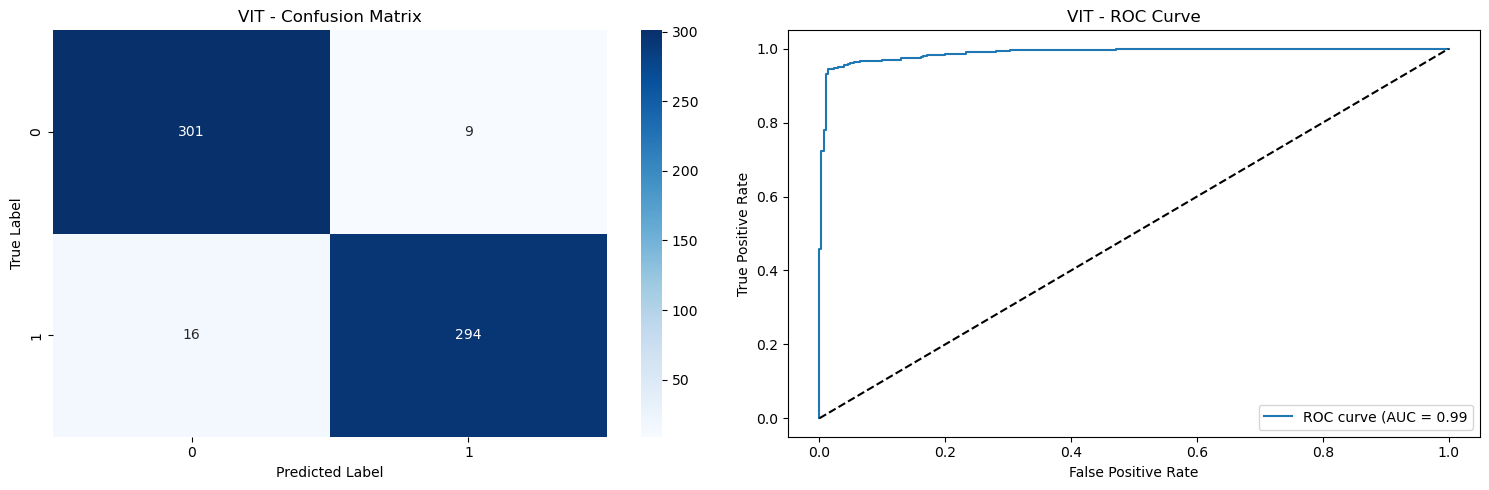


VIT Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       310
         1.0       0.97      0.95      0.96       310

    accuracy                           0.96       620
   macro avg       0.96      0.96      0.96       620
weighted avg       0.96      0.96      0.96       620



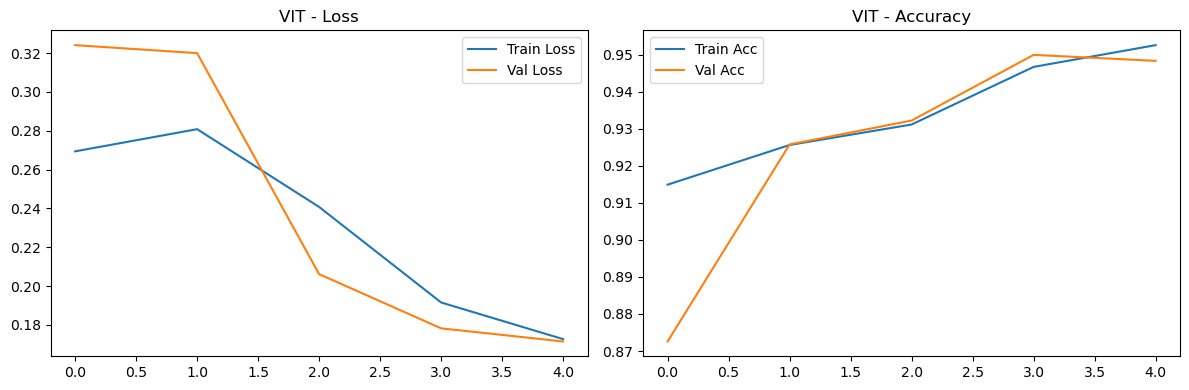


Training DEIT...


DEIT Epoch 1/5: 100%|██████████| 91/91 [33:13<00:00, 21.91s/it, loss=0.00897, acc=92.1]



Epoch 1:
Train Loss: 0.2849, Train Acc: 0.9208
Val Loss: 0.1808, Val Acc: 0.9484


DEIT Epoch 2/5: 100%|██████████| 91/91 [1:00:54<00:00, 40.16s/it, loss=0.00638, acc=93.9]



Epoch 2:
Train Loss: 0.2029, Train Acc: 0.9388
Val Loss: 0.1866, Val Acc: 0.9435


DEIT Epoch 3/5: 100%|██████████| 91/91 [53:48<00:00, 35.48s/it, loss=0.0055, acc=95]     



Epoch 3:
Train Loss: 0.1748, Train Acc: 0.9495
Val Loss: 0.1714, Val Acc: 0.9565


DEIT Epoch 4/5: 100%|██████████| 91/91 [42:11<00:00, 27.81s/it, loss=0.00455, acc=95.7]



Epoch 4:
Train Loss: 0.1446, Train Acc: 0.9568
Val Loss: 0.1327, Val Acc: 0.9532


DEIT Epoch 5/5: 100%|██████████| 91/91 [1:12:32<00:00, 47.83s/it, loss=0.00388, acc=96.3]



Epoch 5:
Train Loss: 0.1232, Train Acc: 0.9627
Val Loss: 0.1440, Val Acc: 0.9500


C:\Users\kingk\AppData\Local\Temp\ipykernel_7540\4012382868.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(Config.MODEL_


Test Loss: 0.1038
Test Accuracy: 0.9645


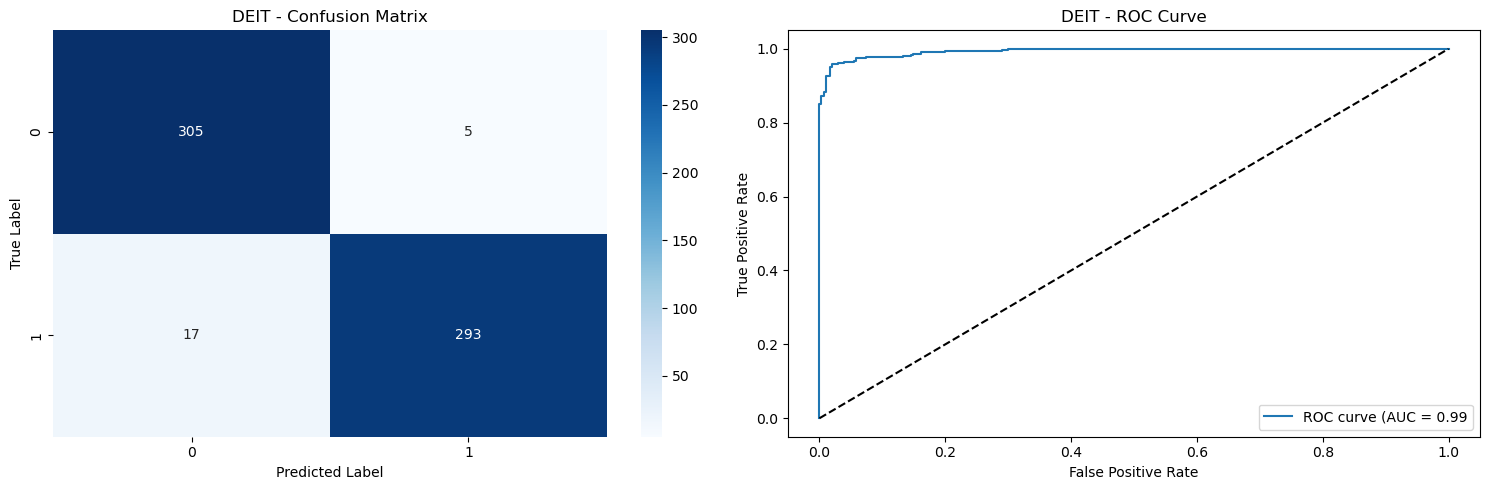


DEIT Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       310
         1.0       0.98      0.95      0.96       310

    accuracy                           0.96       620
   macro avg       0.97      0.96      0.96       620
weighted avg       0.97      0.96      0.96       620



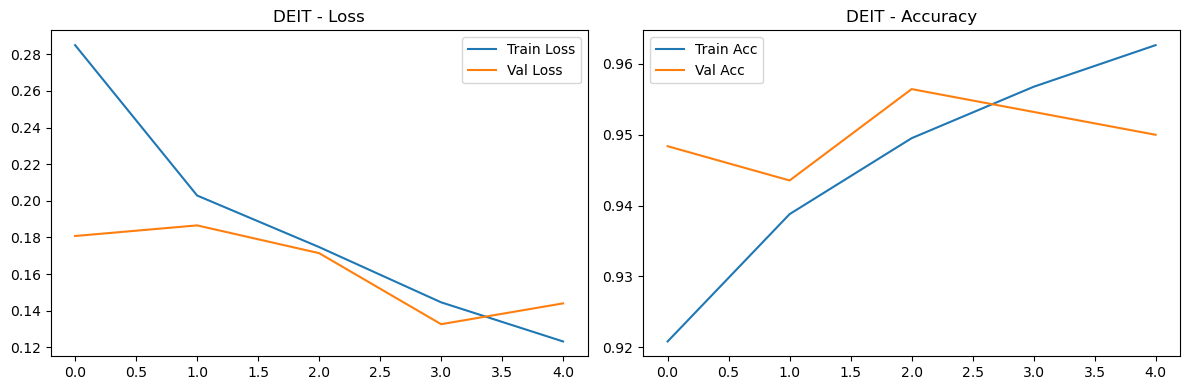

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import timm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import os
from tqdm import tqdm

class Config:
    BASE_PATH = r'C:\Users\kingk\Desktop\caleb\cell_images'
    MODEL_SAVE_PATH = r'C:\Users\kingk\Desktop\caleb\Transformer Malaria'
    BATCH_SIZE = 32  # Reduced batch size for smaller dataset
    IMG_SIZE = 224
    EPOCHS = 5  # Increased epochs since we have less data
    LEARNING_RATE = 2e-4  # Slightly increased learning rate
    DATA_FRACTION = 0.15  # Using only 15% of the total data
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    SEED = 42  # Added seed for reproducibility

class MalariaDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.iloc[idx]['filepaths']
        label = 1 if self.df.iloc[idx]['labels'] == 'Parasitized' else 0

        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.float32)

def create_model(model_type):
    """Create a model based on the specified type"""
    if model_type == "vit":
        model_name = 'vit_base_patch16_224'
    elif model_type == "deit":
        model_name = 'deit_base_patch16_224'
    else:
        raise ValueError(f"Unknown model type: {model_type}")

    model = timm.create_model(model_name, pretrained=True, num_classes=1)

    # Simplified head for smaller dataset
    if hasattr(model, 'head'):
        n_features = model.head.in_features
        model.head = nn.Sequential(
            nn.Linear(n_features, 64),  # Reduced intermediate layer size
            nn.ReLU(),
            nn.Dropout(0.2),  # Reduced dropout
            nn.Linear(64, 1),
            nn.Sigmoid()
        )
    elif hasattr(model, 'fc'):
        n_features = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Linear(n_features, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    return model

def set_seeds():
    """Set seeds for reproducibility"""
    torch.manual_seed(Config.SEED)
    torch.cuda.manual_seed(Config.SEED)
    np.random.seed(Config.SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

def prepare_data():
    """Prepare the dataset using only a fraction of the total data"""
    set_seeds()
    parasitized = os.path.join(Config.BASE_PATH, 'Parasitized')
    uninfected = os.path.join(Config.BASE_PATH, 'Uninfected')

    filepaths = []
    labels = []

    # Define acceptable image extensions
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')

    for folder, label in [(parasitized, 'Parasitized'), (uninfected, 'Uninfected')]:
        files = os.listdir(folder)
        # Filter to include only files with valid image extensions
        valid_files = [file for file in files if file.lower().endswith(valid_extensions)]
        n_files = max(int(len(valid_files) * Config.DATA_FRACTION), 1)
        selected_files = np.random.choice(valid_files, size=n_files, replace=False)
        filepaths.extend([os.path.join(folder, fname) for fname in selected_files])
        labels.extend([label] * len(selected_files))

    df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

    print(f"Total samples: {len(df)}")
    print(f"Class distribution:\n{df['labels'].value_counts()}")

    train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['labels'], random_state=Config.SEED)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['labels'], random_state=Config.SEED)

    print(f"\nSplit sizes:")
    print(f"Train: {len(train_df)}")
    print(f"Validation: {len(val_df)}")
    print(f"Test: {len(test_df)}")

    return train_df, val_df, test_df


def create_data_loaders(train_df, val_df, test_df):
    """Create data loaders with stronger augmentation for smaller dataset"""
    train_transform = transforms.Compose([
        transforms.Resize((Config.IMG_SIZE, Config.IMG_SIZE)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(20),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    val_transform = transforms.Compose([
        transforms.Resize((Config.IMG_SIZE, Config.IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    train_dataset = MalariaDataset(train_df, train_transform)
    val_dataset = MalariaDataset(val_df, val_transform)
    test_dataset = MalariaDataset(test_df, val_transform)

    # Set num_workers to 0 for troubleshooting
    train_loader = DataLoader(train_dataset, batch_size=Config.BATCH_SIZE, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=Config.BATCH_SIZE, shuffle=False, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=Config.BATCH_SIZE, shuffle=False, num_workers=0)

    return train_loader, val_loader, test_loader

def train_model(model_type, train_loader, val_loader, test_loader):
    """Train and evaluate a single model"""
    model = create_model(model_type).to(Config.DEVICE)
    criterion = nn.BCELoss()
    optimizer = optim.AdamW(model.parameters(), lr=Config.LEARNING_RATE, weight_decay=0.01)

    scheduler = optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=Config.LEARNING_RATE,
        epochs=Config.EPOCHS,
        steps_per_epoch=len(train_loader),
        pct_start=0.3
    )

    best_val_loss = float('inf')
    patience = 5  # Early stopping patience
    patience_counter = 0
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(Config.EPOCHS):
        # Training
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        pbar = tqdm(train_loader, desc=f'{model_type.upper()} Epoch {epoch+1}/{Config.EPOCHS}')
        for inputs, labels in pbar:
            inputs, labels = inputs.to(Config.DEVICE), labels.to(Config.DEVICE)

            optimizer.zero_grad()
            outputs = model(inputs)

            # Use view to ensure correct dimensions for BCE Loss
            loss = criterion(outputs.view(-1), labels)

            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            optimizer.step()
            scheduler.step()

            train_loss += loss.item()
            predicted = (outputs.view(-1) > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            pbar.set_postfix({'loss': train_loss/total, 'acc': 100.*correct/total})

        # Validation
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(Config.DEVICE), labels.to(Config.DEVICE)
                outputs = model(inputs)

                # Ensure correct dimensions for BCE Loss
                loss = criterion(outputs.view(-1), labels)

                val_loss += loss.item()
                predicted = (outputs.view(-1) > 0.5).float()
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        # Calculate metrics
        train_loss = train_loss / len(train_loader)
        train_acc = correct / total
        val_loss = val_loss / len(val_loader)
        val_acc = val_correct / val_total

        # Save metrics
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)

        print(f'\nEpoch {epoch + 1}:')
        print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}')
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Save best model and early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(),
                       os.path.join(Config.MODEL_SAVE_PATH, f'{model_type}_best.pth'))
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered after epoch {epoch + 1}")
                break

    # Evaluate on test set
    model.load_state_dict(torch.load(os.path.join(Config.MODEL_SAVE_PATH, f'{model_type}_best.pth')))
    evaluate_model(model, test_loader, model_type)

    return model, history

def evaluate_model(model, test_loader, model_type):
    """Evaluate model performance with additional metrics"""
    model.eval()
    all_preds = []
    all_labels = []
    test_loss = 0
    criterion = nn.BCELoss()

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc=f'Evaluating {model_type.upper()}'):
            inputs = inputs.to(Config.DEVICE)
            labels = labels.to(Config.DEVICE)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            test_loss += loss.item()
            preds = outputs.squeeze().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    pred_classes = (all_preds > 0.5).astype(int)

    # Calculate and print test loss
    test_loss = test_loss / len(test_loader)
    test_acc = accuracy_score(all_labels, pred_classes)
    print(f"\nTest Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    # Plot results
    plt.figure(figsize=(15, 5))

    # Confusion Matrix
    plt.subplot(1, 2, 1)
    cm = confusion_matrix(all_labels, pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_type.upper()} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

    # ROC Curve
    plt.subplot(1, 2, 2)
    fpr, tpr, _ = roc_curve(all_labels, all_preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_type.upper()} - ROC Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"\n{model_type.upper()} Classification Report:")
    print(classification_report(all_labels, pred_classes))

def main():
    set_seeds()
    os.makedirs(Config.MODEL_SAVE_PATH, exist_ok=True)
    print(f"Using device: {Config.DEVICE}")

    # Prepare data
    train_df, val_df, test_df = prepare_data()
    train_loader, val_loader, test_loader = create_data_loaders(train_df, val_df, test_df)

    # Train each model type
    model_types = ['vit', 'deit']
    models = {}
    histories = {}

    for model_type in model_types:
        print(f"\nTraining {model_type.upper()}...")
        model, history = train_model(model_type, train_loader, val_loader, test_loader)
        models[model_type] = model
        histories[model_type] = history

        # Plot training history
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history['train_loss'], label='Train Loss')
        plt.plot(history['val_loss'], label='Val Loss')
        plt.title(f'{model_type.upper()} - Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history['train_acc'], label='Train Acc')
        plt.plot(history['val_acc'], label='Val Acc')
        plt.title(f'{model_type.upper()} - Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()
